# Proceso de Fiscalización

## 1. Obtener Datos

In [59]:
# leer librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Lee la hoja '2017' del archivo Excel
urls = [
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/reporte_donatarias_2021_datos_2020.csv.xls',
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/reporte_donatarias_2022_datos_2021.csv.xls'
]

dataset_2020 = pd.read_csv(urls[0], encoding='latin1', delimiter=',', quotechar='"')
dataset_2021 = pd.read_csv(urls[1], encoding='latin1', delimiter=',', quotechar='"')
dataset_2020 = dataset_2020.rename(columns={'ï»¿rfc': 'rfc'})
dataset = pd.concat([dataset_2020, dataset_2021])
dataset.head(5)

,rfc,razon_social,tipo_donataria,entidad_federativa,dona_efe_nal,dona_efe_ext,dona_esp_nal,dona_esp_ext,ing_arrendamiento,ing_dividendos,...,percep_gerente,percep_patrono,percep_presidente,percep_secretario,percep_socio,percep_tesorero,percep_vicepresidente,percep_vocales,unidad_medida,ejercicio_fiscal
0,AAA040708SB8,AsociaciÃ³n de Amigos de los Archivos Plutarco...,CULTURALES,CIUDAD DE MÃXICO,231289.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,Pesos,2020
1,AAA060215LU2,"Amigos de AAMI, A.C.",APOYO ECONÃMICO DE OTRAS DONATARIAS AUTORIZADAS,CIUDAD DE MÃXICO,187212.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,Pesos,2020
2,AAA060509UEA,"Alternativa de Apoyo a los Asuntos del Menor, ...",DESARROLLO SOCIAL,MÃXICO,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,Pesos,2020
3,AAA061212Q15,AsociaciÃ³n Azteca Amigos de la Cultura y las ...,CULTURALES,CIUDAD DE MÃXICO,20133607.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pesos,2020
4,AAA080527HB7,"Asilo de Ancianos AsunciÃ³n de MarÃ­a, A.C.",ASISTENCIALES,JALISCO,190470.0,0.0,32126.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,Pesos,2020


## 2. Procesar datos

In [60]:
#agrupamos la informacion por razon social
# Definir una función personalizada para aplicar según el tipo de columna
def custom_agg(x):
    if pd.api.types.is_numeric_dtype(x):
        return x.sum()  # Sumar si es numérico (float)
    else:
        return x.iloc[0]  # Tomar el primer valor si es de tipo object

# Agrupar por 'razon_social' y aplicar la función personalizada
dataset = dataset.groupby('rfc').agg(custom_agg).reset_index()


## 3. Se calculan los indicadores


In [61]:
dataset = dataset.groupby('razon_social').sum().reset_index()
dataset.fillna(0, inplace=True)
dataset['gastos_administrativos'] = dataset['gas_admin_nal'] + dataset['gas_admin_ext']
dataset['ing_intereses'] = dataset['ing_intereses'].str.replace(',', '')
#Se modificaron los ingresos para agregar los donativos
dataset['ingresos'] = dataset['dona_efe_nal']+dataset['dona_efe_ext']+dataset['dona_esp_nal']+dataset['dona_esp_ext'] #aqui
dataset['gastos_directivos'] =  dataset['percep_administrador'] + dataset['percep_asociado'] +  dataset['percep_consejero']  +  dataset['percep_coordinador']   +  dataset['percep_director']   +  dataset['percep_directorgral']   + dataset['percep_gerente'] + dataset['percep_patrono'] + dataset['percep_presidente'] + dataset['percep_secretario'] + dataset['percep_socio'] + dataset['percep_tesorero']+ dataset['percep_vicepresidente']+ dataset['percep_vocales']
dataset['pago_administrativos'] =  dataset['gastos_administrativos'] / dataset['ingresos']
dataset['pago_directivos'] =  dataset['gastos_directivos'] / dataset['ingresos']
#filtrar empresas con ingresos de más de un millon
dataset = dataset[dataset['ingresos'] > 1000000]
#porcentaje pago a directivos
dataset_model = dataset.copy()
#filtrar porcentaje mayor a 5%
dataset = dataset[dataset['pago_administrativos'] > 0.05]
#ordernar por gastos_directivos
dataset = dataset.sort_values(by='pago_administrativos', ascending=False)


## 4. Se muestran los datos con los indicadores

In [62]:
dataset.head(5)

,razon_social,rfc,tipo_donataria,entidad_federativa,dona_efe_nal,dona_efe_ext,dona_esp_nal,dona_esp_ext,ing_arrendamiento,ing_dividendos,...,percep_tesorero,percep_vicepresidente,percep_vocales,unidad_medida,ejercicio_fiscal,gastos_administrativos,ingresos,gastos_directivos,pago_administrativos,pago_directivos
2682,"Centros de IntegraciÃ³n Juvenil, A.C.",CIJ731003QK3,ASISTENCIALES,CIUDAD DE MÃXICO,5680740.0,0.0,401386.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Pesos,4041,1.513073e+09,6082126.0,0.00,248.773736,0.000000
10138,"Universidad de La Salle BajÃ­o, A.C.",USB730305MK5,EDUCATIVAS,GUANAJUATO,3789857.0,0.0,434504.0,0.0,832486.0,0.0,...,0.0,0.0,0.0,Pesos,4041,6.069936e+08,4224361.0,14924930.00,143.688867,3.533062
4137,Escuela Libre de Derecho,ELD320206L38,EDUCATIVAS,CIUDAD DE MÃXICO,1325840.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Pesos,4041,1.227747e+08,1325840.0,0.00,92.601422,0.000000
2431,"Centro de Desarrollo Integral Delta, A.C.",CDI960322NW6,EDUCATIVAS,NAYARIT,1268560.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Pesos,4041,5.958946e+07,1268560.0,0.00,46.974097,0.000000
10134,"Universidad Vasco de Quiroga, A.C.",UVQ8007162Q5,EDUCATIVAS,MICHOACÃN,1752445.0,0.0,5000.0,0.0,45168.0,0.0,...,0.0,0.0,0.0,Pesos,4041,8.223689e+07,1757445.0,940571.68,46.793436,0.535193


In [63]:
# Filtrar los primeros valores únicos
top = dataset['tipo_donataria'].value_counts().head(7).index
filtered_data = dataset[dataset['tipo_donataria'].isin(top)]

# Crear un DataFrame con los conteos de cada tipo de donataria
df_plot = filtered_data['tipo_donataria'].value_counts().reset_index()
df_plot.columns = ['tipo_donataria', 'conteo']

# Crear gráfico de barras con Plotly
fig = go.Figure()

# Agregar las barras al gráfico
fig.add_trace(go.Bar(
    x=df_plot['tipo_donataria'],
    y=df_plot['conteo'],
    marker=dict(color='royalblue')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Distribución de los Principales Tipos de Donataria',
    xaxis_title='Tipo de Donataria',
    yaxis_title='Número de Donatarias',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [64]:
# Filtrar los primeros valores únicos
top = dataset['entidad_federativa'].value_counts().head(5).index
filtered_data = dataset[dataset['entidad_federativa'].isin(top)]

# Crear un DataFrame con los conteos de cada entidad federativa
df_plot = filtered_data['entidad_federativa'].value_counts().reset_index()
df_plot.columns = ['entidad_federativa', 'conteo']

# Crear gráfico de barras con Plotly
fig = go.Figure()

# Agregar las barras al gráfico
fig.add_trace(go.Bar(
    x=df_plot['entidad_federativa'],
    y=df_plot['conteo'],
    marker=dict(color='cornflowerblue')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Distribución de las Principales Entidades Federativas',
    xaxis_title='Entidad Federativa',
    yaxis_title='Número de Donatarias',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [65]:
# Agrupar por tipo_donataria y sumar los ingresos
grouped_data = dataset.groupby('tipo_donataria')['ingresos'].sum().reset_index()

# Ordenar los datos para mostrar los tipos de donataria con mayores ingresos
top = grouped_data.nlargest(5, 'ingresos')

# Crear gráfico de barras con Plotly
fig = go.Figure()

# Agregar las barras al gráfico
fig.add_trace(go.Bar(
    x=top['tipo_donataria'],
    y=top['ingresos'],
    marker=dict(color='lightskyblue')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Suma de Ingresos por los Principales Tipos de Donataria',
    xaxis_title='Tipo de Donataria',
    yaxis_title='Ingresos',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [66]:

# Agrupar por tipo_donataria y sumar los ingresos de dona_efe_nal y dona_efe_ext
grouped_data = dataset.groupby('tipo_donataria')[['dona_efe_nal', 'dona_efe_ext']].sum().reset_index()

# Seleccionar los 5 principales tipos de donataria basados en el total de ingresos (nacional + extranjero)
grouped_data['total_ingresos'] = grouped_data['dona_efe_nal'] + grouped_data['dona_efe_ext']
top = grouped_data.nlargest(5, 'total_ingresos')

# Crear gráfico de barras apiladas con Plotly
fig = go.Figure()

# Gráfica para dona_efe_nal (nacional)
fig.add_trace(go.Bar(
    x=top['tipo_donataria'],
    y=top['dona_efe_nal'],
    name='Donaciones Nacionales',
    marker=dict(color='skyblue')
))

# Gráfica para dona_efe_ext (extranjero)
fig.add_trace(go.Bar(
    x=top['tipo_donataria'],
    y=top['dona_efe_ext'],
    name='Donaciones Extranjeras',
    marker=dict(color='orange')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Top Tipos de Donataria - Distribución de Donaciones Nacionales y Extranjeras',
    xaxis_title='Tipo de Donataria',
    yaxis_title='Total de Donaciones',
    barmode='stack',
    xaxis_tickangle=-45,
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [67]:

# Agrupar por razón_social y sumar los gastos directivos
top = dataset.groupby('razon_social')['pago_directivos'].sum().nlargest(20).reset_index()

# Crear gráfico de barras con Plotly
fig = go.Figure()

# Gráfico de barras para el Top de Razón Social con más gastos directivos
fig.add_trace(go.Bar(
    x=top['pago_directivos'],
    y=top['razon_social'],
    orientation='h',  # Horizontal bar chart
    marker=dict(color='lightskyblue')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Top Razón Social con Más Pagos Directivos',
    xaxis_title='Total de Pagos Directivos',
    yaxis_title='Razón Social',
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [68]:
print(top.head(10).to_markdown())


|    | razon_social                                                                                                 |   pago_directivos |
|---:|:-------------------------------------------------------------------------------------------------------------|------------------:|
|  0 | Universidad Marista de MÃ©rida, A.C.                                                                         |          18.3001  |
|  1 | The American School Foundation, A.C.                                                                         |           7.08285 |
|  2 | AsociaciÃ³n Nacional de Universidades e Instituciones de EducaciÃ³n Superior de la RepÃºblica Mexicana, A.C. |           6.04054 |
|  3 | Montessori del Pedregal, A.C.                                                                                |           5.20169 |
|  4 | Promotora de Centros Educativos de Occidente, A.C.                                                           |           4.54487 |
|  5 | Oxford School of English, A

In [69]:

# Agrupar por razón_social y sumar los gastos administrativos
top = dataset.groupby('razon_social')['pago_administrativos'].sum().nlargest(10).reset_index()

# Crear gráfico de barras con Plotly
fig = go.Figure()

# Gráfico de barras para el Top 10 de razón_social con más gastos administrativos
fig.add_trace(go.Bar(
    x=top['pago_administrativos'],
    y=top['razon_social'],
    orientation='h',  # Horizontal bar chart
    marker=dict(color='lightskyblue')
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Top Razón Social con Más Pagos Administrativos',
    xaxis_title='Total de Pagos Administrativos',
    yaxis_title='Razón Social',
    template='plotly_white'
)

# Mostrar gráfica
fig.show()


In [70]:
print(top.head(10).to_markdown())


|    | razon_social                                        |   pago_administrativos |
|---:|:----------------------------------------------------|-----------------------:|
|  0 | Centros de IntegraciÃ³n Juvenil, A.C.               |               248.774  |
|  1 | Universidad de La Salle BajÃ­o, A.C.                 |               143.689  |
|  2 | Escuela Libre de Derecho                            |                92.6014 |
|  3 | Centro de Desarrollo Integral Delta, A.C.           |                46.9741 |
|  4 | Universidad Vasco de Quiroga, A.C.                  |                46.7934 |
|  5 | Universidad Liceo Cervantino, S.C.                  |                38.5362 |
|  6 | Universidad AutÃ³noma del Noreste, A.C.             |                37.3176 |
|  7 | The American School Foundation of Guadalajara, A.C. |                34.7296 |
|  8 | El Colegio de MÃ©xico, A.C.                         |                33.855  |
|  9 | Colegio Americano de Puerto Vallarta, A.C.    

## Distribución de Gastos Administrativos


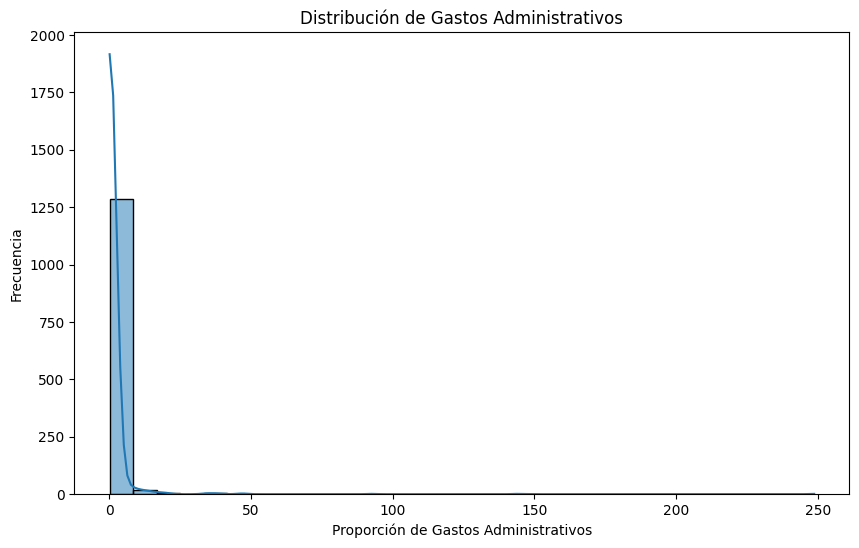

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['pago_administrativos'], bins=30, kde=True)
plt.title('Distribución de Gastos Administrativos')
plt.xlabel('Proporción de Gastos Administrativos')
plt.ylabel('Frecuencia')
plt.show()


## Comparación de Ingresos y Gastos Administrativos

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 154 (\x9a) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 147 (\x93) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 141 (\x8d) missing from current font.



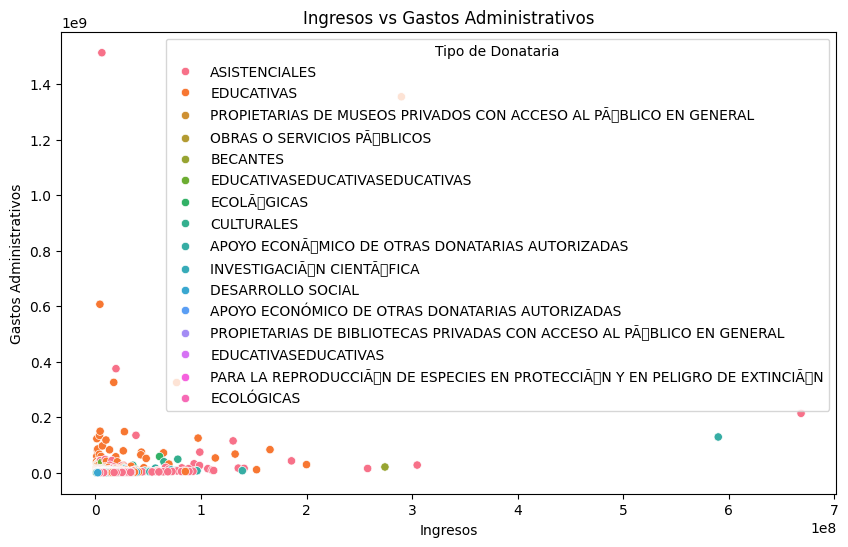

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ingresos', y='gastos_administrativos', hue='tipo_donataria')
plt.title('Ingresos vs Gastos Administrativos')
plt.xlabel('Ingresos')
plt.ylabel('Gastos Administrativos')
plt.legend(title='Tipo de Donataria')
plt.show()


## Modelo de Machine learning

In [73]:
#preparamos los datos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear la variable objetivo
dataset_model['cumple_5'] = dataset_model['pago_administrativos'] <= 0.05

# Seleccionar características relevantes
features = ['ingresos', 'gastos_administrativos', 'gastos_directivos']
X = dataset_model[features]
y = dataset_model['cumple_5']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:
#entrenamos el modelo
# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      0.95      0.97       400
        True       0.98      0.99      0.99       974

    accuracy                           0.98      1374
   macro avg       0.98      0.97      0.98      1374
weighted avg       0.98      0.98      0.98      1374



## Resultados del Modelo

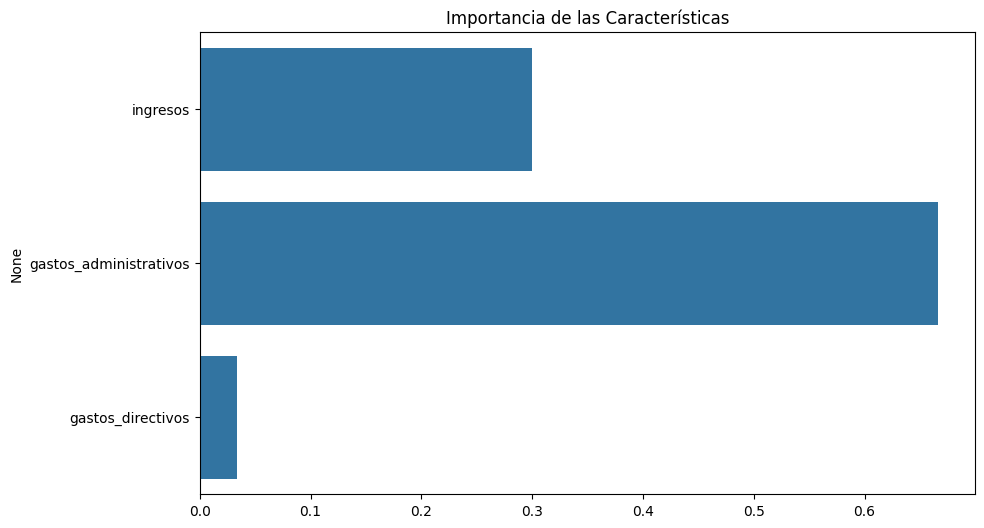

In [75]:
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Importancia de las Características')
plt.show()


## Matriz de confusión

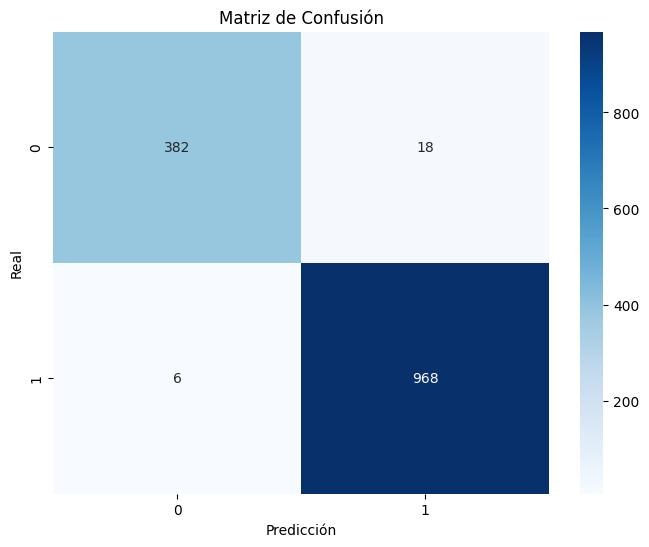

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [79]:
dataset_model.cumple_5.value_counts()

,count
cumple_5,
True,3262
False,1315


## Cruzar con otras fuentes

In [80]:
# Lee la hoja '2017' del archivo Excel
urls = [
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/Cancelados.csv',
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/firmes.xlsx',
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/No_localizados.csv',
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/Exigibles.csv',
'https://raw.githubusercontent.com/erlinares/donatarias/main/data/ReduccionArt74CFF.csv',

]

cancelados = pd.read_csv(urls[0], encoding='latin1', delimiter=',', quotechar='"')
noLocalizados = pd.read_csv(urls[2], encoding='latin1', delimiter=',', quotechar='"')
exigibles = pd.read_csv(urls[3], encoding='latin1', delimiter=',', quotechar='"')
reduccion = pd.read_csv(urls[4], encoding='latin1', delimiter=',', quotechar='"')
firmes = pd.read_excel(urls[1])

In [81]:
dataset["irregular"] = dataset['pago_administrativos'] > 0.05


In [82]:
# buscar coincidencias
# Crear la columna 'cancelado' en 'dataset' con 1 si el RFC está en 'cancelado', 0 si no está
dataset['cancelado'] = dataset['rfc'].isin(cancelados['RFC']).astype(int)
dataset['noLocalizados'] = dataset['rfc'].isin(noLocalizados['RFC']).astype(int)
dataset['exigibles'] = dataset['rfc'].isin(exigibles['RFC']).astype(int)
dataset['reduccion'] = dataset['rfc'].isin(reduccion['RFC']).astype(int)
dataset['firmes'] = dataset['rfc'].isin(firmes['RFC']).astype(int)

In [83]:
dataset = dataset[['rfc','ingresos','gastos_administrativos','pago_administrativos','irregular','cancelado','noLocalizados','exigibles','reduccion','firmes']]

In [84]:
dataset

,rfc,ingresos,gastos_administrativos,pago_administrativos,irregular,cancelado,noLocalizados,exigibles,reduccion,firmes
2682,CIJ731003QK3,6082126.0,1.513073e+09,248.773736,True,0,0,0,0,0
10138,USB730305MK5,4224361.0,6.069936e+08,143.688867,True,0,0,0,0,0
4137,ELD320206L38,1325840.0,1.227747e+08,92.601422,True,0,0,0,0,0
2431,CDI960322NW6,1268560.0,5.958946e+07,46.974097,True,0,0,0,0,0
10134,UVQ8007162Q5,1757445.0,8.223689e+07,46.793436,True,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6066,FRH141118AB5,7735079.0,3.879940e+05,0.050160,True,0,0,0,0,0
6509,GTC070212GM2,2885834.0,1.447180e+05,0.050148,True,0,0,0,0,0
7267,IRK180206K1A,3986147.0,1.997790e+05,0.050118,True,0,0,0,0,0
9001,PIN960529DK2,17722482.0,8.872313e+05,0.050062,True,0,0,0,0,0


In [85]:
#conducta irregulares
filtered_df = dataset[(dataset[['cancelado', 'noLocalizados', 'exigibles', 'reduccion', 'firmes']] == 1).any(axis=1)]


In [86]:
filtered_df

,rfc,ingresos,gastos_administrativos,pago_administrativos,irregular,cancelado,noLocalizados,exigibles,reduccion,firmes
10114,ULC020424DP3,2221775.0,85618791.00,38.536211,True,0,0,0,1,0
9676,SEB240102467,2244905.0,19602182.00,8.731854,True,0,0,0,1,0
2805,CVC0012221T2,1112804.0,7896879.56,7.096380,True,0,0,0,1,0
6832,HJE240101324,2193084.0,8070940.00,3.680178,True,0,1,0,0,0
7103,ICM570828MP6,1144300.0,2524200.31,2.205890,True,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
375,AMM0501102G3,3869873.0,213500.99,0.055170,True,0,0,0,1,0
9271,RVI081008TS6,1668371.0,89500.00,0.053645,True,0,0,0,1,0
279,AVE920907G94,139214456.0,7373003.00,0.052961,True,0,0,0,0,1
2421,CDA0112067KA,31150416.0,1638495.50,0.052599,True,0,0,0,1,0


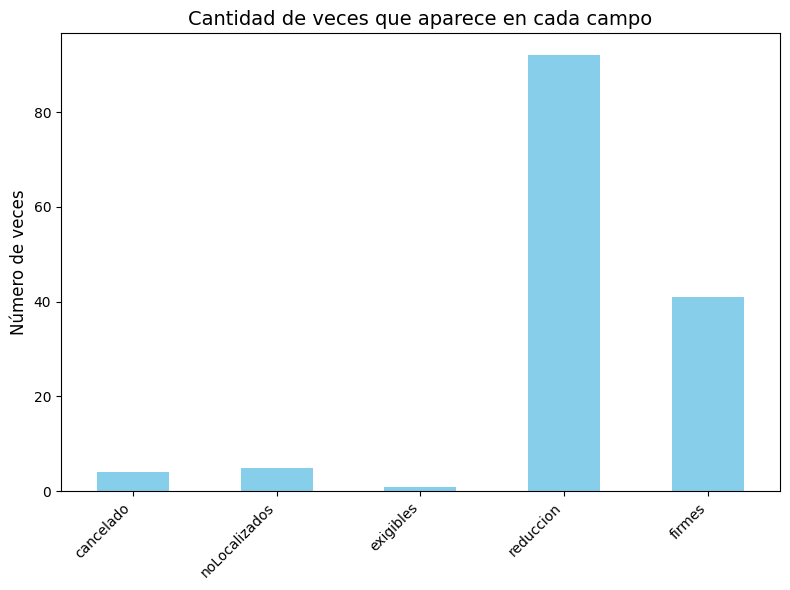

In [87]:
# Contar el número de veces que aparece True en cada columna
true_counts = filtered_df[['cancelado', 'noLocalizados', 'exigibles', 'reduccion', 'firmes']].sum()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
true_counts.plot(kind='bar', color='skyblue')

# Agregar título y etiquetas
plt.title('Cantidad de veces que aparece en cada campo', fontsize=14)
plt.ylabel('Número de veces', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [90]:
filtered_df[['rfc','ingresos','gastos_administrativos','pago_administrativos','cancelado','noLocalizados','exigibles','reduccion','firmes']]
filtered_df.to_excel('irregulares.xlsx', index=False)

## **Conclusión**:

Con estas herramientas y técnicas, puedes crear un informe detallado que no solo muestre el estado actual de las empresas donatarias, sino que también prediga cuáles podrían estar incumpliendo las regulaciones. Esto te permitirá fiscalizar de manera más eficiente y proactiva.


**Conclusiones Financieras**


Eficiencia en el Uso de Recursos: Las empresas que mantienen sus gastos administrativos por debajo del 5% de sus ingresos demuestran una gestión financiera eficiente, maximizando el impacto de sus donaciones.


Riesgo de Irregularidades: Identificar empresas que superan el 5% en gastos administrativos y no están en conjuntos de datos problemáticos permite tomar medidas preventivas y correctivas para asegurar el cumplimiento de las regulaciones.


Transparencia y Confianza: Empresas con bajos gastos administrativos generan mayor confianza entre los donantes y el público, lo que puede resultar en un aumento en las donaciones y una mejor reputación.


Predicción y Prevención: El uso de machine learning para predecir incumplimientos permite una fiscalización proactiva, optimizando los recursos de auditoría y supervisión.


Optimización de Recursos: Identificar patrones en los datos ayuda a las empresas a optimizar sus recursos y mejorar su planificación financiera, reduciendo costos y aumentando la eficiencia operativa.


Benchmarking: Comparar los gastos administrativos de diferentes empresas permite establecer benchmarks y mejores prácticas, promoviendo la adopción de estrategias eficientes.


Impacto en la Sostenibilidad: Una gestión eficiente de los recursos financieros asegura la sostenibilidad a largo plazo de las empresas, permitiéndoles continuar operando y cumpliendo su misión.


Identificación de Áreas de Mejora: El análisis de datos revela áreas específicas donde las empresas pueden mejorar, permitiendo una gestión más efectiva de los costos.


Cumplimiento Regulatorio: Asegurar el cumplimiento del límite del 5% en gastos administrativos evita sanciones legales y mantiene la operatividad y licencia de las empresas donatarias.


Mejora en la Toma de Decisiones: Datos precisos y análisis detallados mejoran la toma de decisiones financieras, llevando a una gestión más efectiva y eficiente.